In [2]:
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
 tf. __version__

'2.16.1'

In [29]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
print(negative_samples, positive_samples)
print(positive_samples)

[[ 0.1014452   4.64069773]
 [-0.50418994  4.18282916]
 [ 0.26436891  3.15051093]
 ...
 [ 0.17144404  3.99984745]
 [ 0.06654885  3.0331326 ]
 [ 0.21901414  2.91480608]] [[ 2.31485916 -0.27685126]
 [ 3.54451692  1.08839607]
 [ 2.52440375 -0.3850034 ]
 ...
 [ 1.91535573 -2.22655931]
 [ 1.5366701  -0.98453491]
 [ 4.36854454  1.01509947]]
[[ 2.31485916 -0.27685126]
 [ 3.54451692  1.08839607]
 [ 2.52440375 -0.3850034 ]
 ...
 [ 1.91535573 -2.22655931]
 [ 1.5366701  -0.98453491]
 [ 4.36854454  1.01509947]]


In [9]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs

array([[ 0.34164438,  3.793243  ],
       [-0.01288121,  3.979208  ],
       [-0.6492277 ,  1.7488267 ],
       ...,
       [ 2.1199186 , -2.8583658 ],
       [ 4.75112   ,  0.29268655],
       [ 3.602071  ,  0.78293943]], dtype=float32)

In [7]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

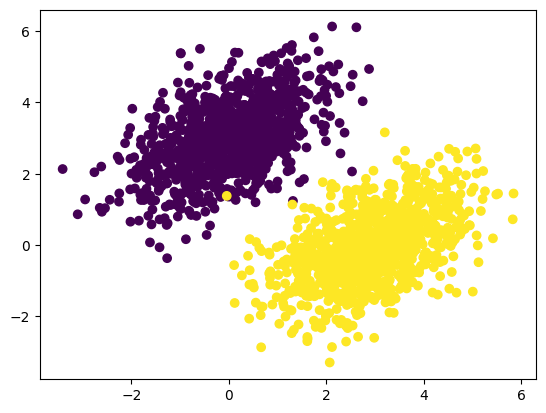

In [10]:

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()


In [11]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [12]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [14]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [21]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [22]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 4.3715
Loss at step 1: 0.5511
Loss at step 2: 0.1915
Loss at step 3: 0.1478
Loss at step 4: 0.1341
Loss at step 5: 0.1241
Loss at step 6: 0.1152
Loss at step 7: 0.1071
Loss at step 8: 0.0998
Loss at step 9: 0.0931
Loss at step 10: 0.0870
Loss at step 11: 0.0814
Loss at step 12: 0.0764
Loss at step 13: 0.0718
Loss at step 14: 0.0676
Loss at step 15: 0.0638
Loss at step 16: 0.0603
Loss at step 17: 0.0572
Loss at step 18: 0.0543
Loss at step 19: 0.0517
Loss at step 20: 0.0493
Loss at step 21: 0.0471
Loss at step 22: 0.0451
Loss at step 23: 0.0433
Loss at step 24: 0.0417
Loss at step 25: 0.0402
Loss at step 26: 0.0389
Loss at step 27: 0.0376
Loss at step 28: 0.0365
Loss at step 29: 0.0355
Loss at step 30: 0.0346
Loss at step 31: 0.0337
Loss at step 32: 0.0329
Loss at step 33: 0.0322
Loss at step 34: 0.0316
Loss at step 35: 0.0310
Loss at step 36: 0.0305
Loss at step 37: 0.0300
Loss at step 38: 0.0296
Loss at step 39: 0.0292


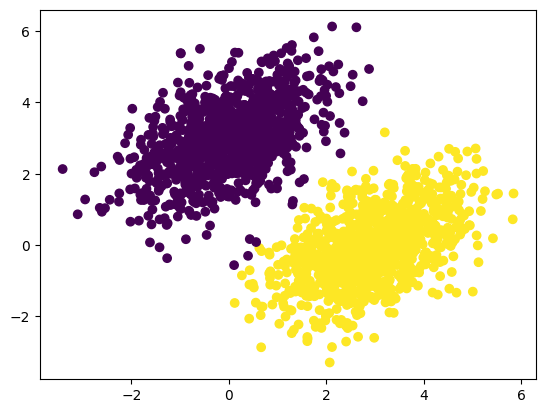

In [23]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

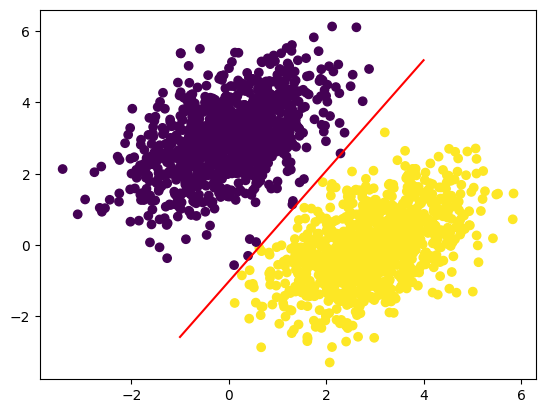

In [24]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)